In [1]:
# /Users/cn180450/anaconda3/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin

import cv2
import os
import random
random.seed(255)
import imutils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display(image, flip=True, cmap=None, figsize=(6, 6), **kwargs):
    if flip:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
    # adjustment for histograms
    if kwargs.get("is_histogram", False):
        plt.figure(figsize=figsize)
        plt.plot(image)
    else:
        width=image.shape[1] 
        height=image.shape[0]
        margin=50 
        # dots per inch
        dpi=100.
        # inches
        figsize=((width+2*margin)/dpi, (height+2*margin)/dpi)
        #axes ratio
        left = margin/dpi/figsize[0] 
        bottom = margin/dpi/figsize[1]
        fig = plt.figure(figsize=figsize, dpi=dpi)
        fig.subplots_adjust(left=left, bottom=bottom, right=1.-left, top=1.-bottom)
        _ = plt.imshow(image, cmap=cmap)
        plt.axis("off")
    plt.title(kwargs.get("title", None))
    plt.xlabel(kwargs.get("xlabel", None))
    plt.ylabel(kwargs.get("ylabel", None))
    plt.xlim(kwargs.get("xlim", None))
    plt.show()
    

### KNN Classifier

In [3]:
from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import load_digits
from skimage import exposure
import sklearn
from sklearn.model_selection import train_test_split

In [4]:
mnist = load_digits()

In [13]:
# train, test
x_train, x_test, y_train, y_test = train_test_split(
    np.array(mnist.data), mnist.target, 
    test_size=0.25, random_state=42
)
# train, validation
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=84
)
print(len(x_train), len(x_val), len(x_test))

1212 135 450


In [14]:
k_values = range(1, 30, 2)
accuracies = []

# loop over values of k 
for k in range(1, 30, 2):
    # train
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    # evaluate
    score = knn.score(x_val, y_val)
    print("k=%d, accuracy=%.2f%%" % (k, score*100))
    accuracies.append(score)
    
i = int(np.argmax(accuracies))
print("k=%d achieved  highest accuracy of %.2f%% on validation data" % (k_values[i], accuracies[i]*100))

k=1, accuracy=99.26%
k=3, accuracy=99.26%
k=5, accuracy=99.26%
k=7, accuracy=99.26%
k=9, accuracy=99.26%
k=11, accuracy=99.26%
k=13, accuracy=99.26%
k=15, accuracy=99.26%
k=17, accuracy=98.52%
k=19, accuracy=98.52%
k=21, accuracy=97.78%
k=23, accuracy=97.04%
k=25, accuracy=97.78%
k=27, accuracy=97.04%
k=29, accuracy=97.04%
k=1 achieved  highest accuracy of 99.26% on validation data


In [9]:
# retrain using best k value
model = KNeighborsClassifier(n_neighbors=k_values[i])
model.fit(x_train, y_train)
y_hat = model.predict(x_test)


print("Classification Report")
print(classification_report(y_test, y_hat))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        38
           3       0.98      0.98      0.98        46
           4       0.98      0.98      0.98        55
           5       0.98      1.00      0.99        59
           6       1.00      1.00      1.00        45
           7       1.00      0.98      0.99        41
           8       0.97      0.95      0.96        38
           9       0.96      0.94      0.95        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



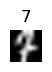

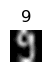

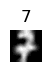

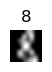

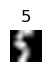

In [10]:
# loop over predictions and visualize
for i in list(map(int, np.random.randint(0, high=len(x_test), size=(5, )))):
    # fetch image
    image = x_test[i]
    prediction = model.predict(image.reshape(1, -1))[0]
    
    # convert the image for a 64 dim array to an 8x8 image
    image = image.reshape((8, 8)).astype("uint8")
    iamge = exposure.rescale_intensity(image, out_range=(0, 255))
    image = imutils.resize(image, width=32, inter=cv2.INTER_CUBIC)
    
    display(image, flip=False, cmap="gray", title=str(prediction))

### Logistic Regression

In [15]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [16]:
dataset = datasets.fetch_lfw_people(min_faces_per_person=70, funneled=True, resize=0.5)
# train, test
x_train, x_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, 
    test_size=0.25, random_state=42
)
print(len(x_train), len(x_test))

966 322


In [17]:
model = LogisticRegression()
model.fit(x_train, y_train)
print(classification_report(
    y_test, model.predict(x_test), target_names=dataset.target_names
))

/Users/cn180450/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/cn180450/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


                   precision    recall  f1-score   support

     Ariel Sharon       0.73      0.62      0.67        13
     Colin Powell       0.78      0.88      0.83        60
  Donald Rumsfeld       0.65      0.63      0.64        27
    George W Bush       0.93      0.90      0.91       146
Gerhard Schroeder       0.78      0.72      0.75        25
      Hugo Chavez       0.62      0.53      0.57        15
       Tony Blair       0.78      0.86      0.82        36

         accuracy                           0.83       322
        macro avg       0.75      0.73      0.74       322
     weighted avg       0.83      0.83      0.82       322



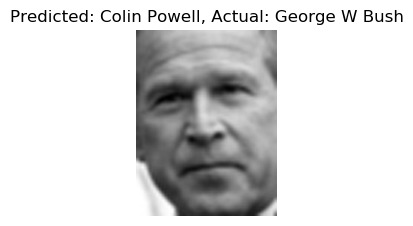

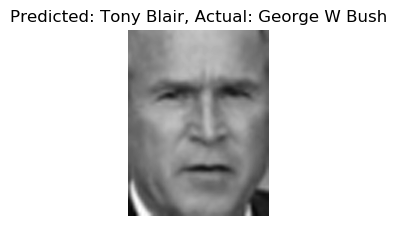

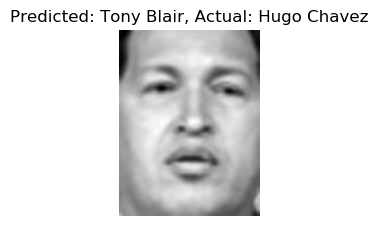

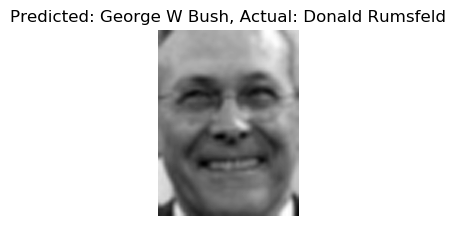

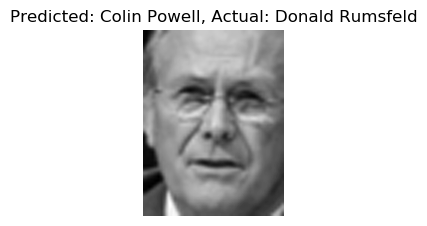

In [19]:
# loop over predictions and visualize
for i in list(map(int, np.random.randint(0, high=len(x_test), size=(5, )))):
    # fetch image
    image = x_test[i].reshape((62, 47))
    name = dataset.target_names[y_test[i]]
    image = imutils.resize(image.astype("uint8"), width=image.shape[1]*3, inter=cv2.INTER_CUBIC)
    
    prediction = model.predict(x_train[i].reshape(1, -1))[0]
    prediction = dataset.target_names[prediction]
    
    display(
        image, flip=False, cmap="gray", 
        title="Predicted: {}, Actual: {}".format(prediction, name)
    )

In [20]:
v = [0.62, 0.97, 0.05, 0.33]
w = [0.26, 0.18, 0.22, 0.1]
np.dot(v, w)

0.37979999999999997

In [21]:
1/(1+np.exp(-0.379799999999))

0.5938248644602941

### Support Vector Machines

In [25]:
from sklearn.svm import SVC

# generating XOR data

tl = np.random.uniform(size=(100, 2)) + np.array([-2.0, 2.0])
tr = np.random.uniform(size=(100, 2)) + np.array([2.0, 2.0])
br = np.random.uniform(size=(100, 2)) + np.array([2.0, -2.0])
bl = np.random.uniform(size=(100, 2)) + np.array([-2.0, -2.0])
X = np.vstack([tl, tr, br, bl])
y = np.hstack([[1]*len(tl), [-1]*len(tr), [1]*len(br), [-1]*len(bl)])

In [26]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [29]:
# Linear Kernel
print("[RESULTS] SVM w/Linear Kernel")
model = SVC(kernel="linear")
model.fit(x_train, y_train)
print(classification_report(y_test, model.predict(x_test)))


[RESULTS] SVM w/Linear Kernel
              precision    recall  f1-score   support

          -1       0.59      1.00      0.74        44
           1       1.00      0.45      0.62        56

    accuracy                           0.69       100
   macro avg       0.79      0.72      0.68       100
weighted avg       0.82      0.69      0.67       100



In [30]:
# Polynomial Kernel
print("[RESULTS] SVM w/ Polynomisl Kernel")
model = SVC(kernel="poly", degree=2, coef0=1)
model.fit(x_train, y_train)
print(classification_report(y_test, model.predict(x_test)))

[RESULTS] SVM w/ Polynomisl Kernel
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        56

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



/Users/cn180450/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Decision Trees

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imutils import paths
import mahotas

In [32]:
def describe(image):
    
    # extract features in HSV space
    means, stds = cv2.meanStdDev(
        cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    )
    color_stats = np.concatenate([means, stds]).flatten()
    
    # extract HARALICK texture features
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    
    # return
    return np.hstack([color_stats, haralick])

In [33]:
print("[INFO] Extracting Features")
image_paths = sorted(paths.list_images("images/4scenes/"))
labels = []
data = []

for image_path in image_paths:
    # label
    label = image_path[image_path.rfind("/") + 1:].split("_")[0]
    image = cv2.imread(image_path)
    
    # extract features
    features = describe(image)
    labels.append(label)
    data.append(features)

[INFO] Extracting Features


In [34]:
x_train, x_test, y_train, y_test = train_test_split(
    np.array(data), np.array(labels), 
    test_size=0.25, random_state=42
)

In [39]:
# Desicison Tree Classifer

model = DecisionTreeClassifier(random_state=84)
print("[INFO] Training Decision Tree")
model.fit(x_train, y_train)
print("[INFO] Evaluating...")
y_hat = model.predict(x_test)
print(classification_report(y_test, y_hat))

[INFO] Training Decision Tree
[INFO] Evaluating...
              precision    recall  f1-score   support

       coast       0.81      0.70      0.75        93
      forest       0.91      0.90      0.90        87
     highway       0.68      0.71      0.70        63
      street       0.72      0.84      0.77        67

    accuracy                           0.79       310
   macro avg       0.78      0.79      0.78       310
weighted avg       0.79      0.79      0.79       310



In [40]:
# Random Forest Classifier

model = RandomForestClassifier(n_estimators=20, random_state=42)
print("[INFO] Training Random Forest Classifier")
model.fit(x_train, y_train)
print("[INFO] Evaluating...")
y_hat = model.predict(x_test)
print(classification_report(y_test, y_hat))

[INFO] Training Random Forest Classifier
[INFO] Evaluating...
              precision    recall  f1-score   support

       coast       0.85      0.83      0.84        93
      forest       0.94      0.95      0.95        87
     highway       0.86      0.70      0.77        63
      street       0.76      0.91      0.83        67

    accuracy                           0.85       310
   macro avg       0.85      0.85      0.85       310
weighted avg       0.86      0.85      0.85       310

